For my project, I will use the Bike-Sharing Data set from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

This data set includes information about a particular day including weather data and the type of day (day of week, holiday or workday, etc). I will examine these features to try to predict the number of bikes taken out for a given day. 

Here's an explanation of the variables included in this data set:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [259]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import scipy.stats as stats

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [165]:
bikeDailyData = pd.read_csv("../data/Bike-Sharing-Dataset (1)/day.csv")
bikeHourlyData = pd.read_csv("../data/Bike-Sharing-Dataset (1)/hour.csv")

In [166]:
bikeDailyData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [167]:
bikeHourlyData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [168]:
#drop instant column since it doesn't add anything new
bikeDailyData = bikeDailyData.drop(["instant"], axis=1)
bikeHourlyData = bikeHourlyData.drop(["instant"], axis=1)

In [170]:
print("Shape of Daily: ", bikeDailyData.shape, "Shape of Hourly: ", bikeHourlyData.shape)
print(bikeDailyData.dtypes)
print(bikeHourlyData.dtypes)

Shape of Daily:  (731, 15) Shape of Hourly:  (17379, 16)
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [178]:
#basic summary statistics about the number of bikes rented per day
print("DAILY")
print("Count mean: ", bikeDailyData.cnt.mean())
print("Count median: ", bikeDailyData.cnt.median())
print("Count standard deviations: ", bikeDailyData.cnt.std())

print("\nCasual mean: ", bikeDailyData.casual.mean())
print("Casual median: ", bikeDailyData.casual.median())
print("Casual standard deviations: ", bikeDailyData.casual.std())

print("\nRegistered mean: ", bikeDailyData.registered.mean())
print("Registered median: ", bikeDailyData.registered.median())
print("Registered standard deviations: ", bikeDailyData.registered.std())

print("\nHOURLY")
print("Count mean: ", bikeHourlyData.cnt.mean())
print("Count median: ", bikeHourlyData.cnt.median())
print("Count standard deviations: ", bikeHourlyData.cnt.std())

print("\nCasual mean: ", bikeHourlyData.casual.mean())
print("Casual median: ", bikeHourlyData.casual.median())
print("Casual standard deviations: ", bikeHourlyData.casual.std())

print("\nRegistered mean: ", bikeHourlyData.registered.mean())
print("Registered median: ", bikeHourlyData.registered.median())
print("Registered standard deviations: ", bikeHourlyData.registered.std())

DAILY
Count mean:  4504.3488372093025
Count median:  4548.0
Count standard deviations:  1937.2114516187678

Casual mean:  848.1764705882352
Casual median:  713.0
Casual standard deviations:  686.6224882846549

Registered mean:  3656.172366621067
Registered median:  3662.0
Registered standard deviations:  1560.2563770194527

HOURLY
Count mean:  189.46308763450142
Count median:  142.0
Count standard deviations:  181.38759909186527

Casual mean:  35.67621842453536
Casual median:  17.0
Casual standard deviations:  49.305030387053186

Registered mean:  153.78686920996606
Registered median:  115.0
Registered standard deviations:  151.35728591258317


Since the time of year seems like it would be a major contributing factor to how many bikes are used, I wil compute the statistics broken down by season.

In [279]:
#summary statistics by season
seasonDailyGroups = bikeDailyData.groupby("season")
seasonDailyGroups.cnt.agg([np.mean, np.median, np.size, np.std])

,mean,median,size,std
season,,,,
1,2604.132597,2209.0,181,1399.942119
2,4992.331522,4941.5,184,1695.977235
3,5644.303191,5353.5,188,1459.800381
4,4728.162921,4634.5,178,1699.615261


In [181]:
seasonHourlyGroups = bikeHourlyData.groupby("season")
seasonHourlyGroups.cnt.agg([np.mean, np.median, np.size, np.std])

,mean,median,size,std
season,,,,
1,111.114569,76.0,4242,119.224010
2,208.344069,165.0,4409,188.362473
3,236.016237,199.0,4496,197.711630
4,198.868856,155.5,4232,182.967972


Weather condition, humidity, and windspeed are negatively correlated with the number of bikes. Temp and atemp are postitively correlated.

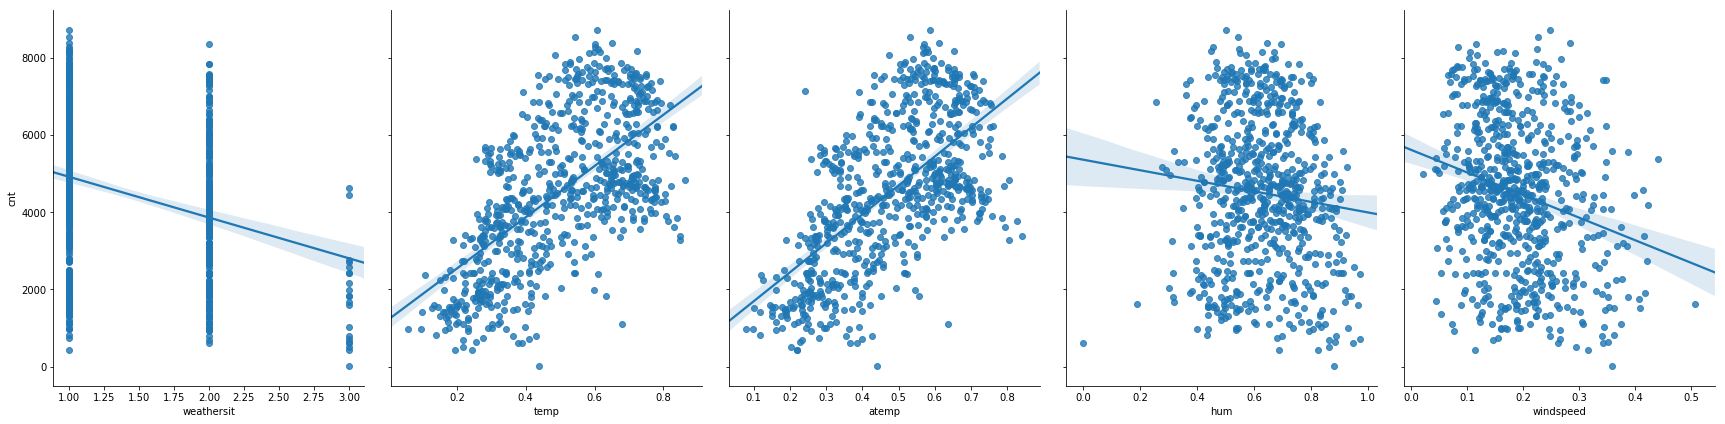

In [251]:
#visualize weather vs. # of bikes
sns.pairplot(bikeDailyData,x_vars = ["weathersit", "temp", "atemp", "hum","windspeed"],y_vars = ["cnt"], size = 6, aspect = 0.8, kind = "reg")

Below are the graphs comparing the type of day to the number of bikes used. More bikes are used in the warmer seasons/ months. More bikes are used on non-holidays and workdays. The most bikes are used on the weekends. 

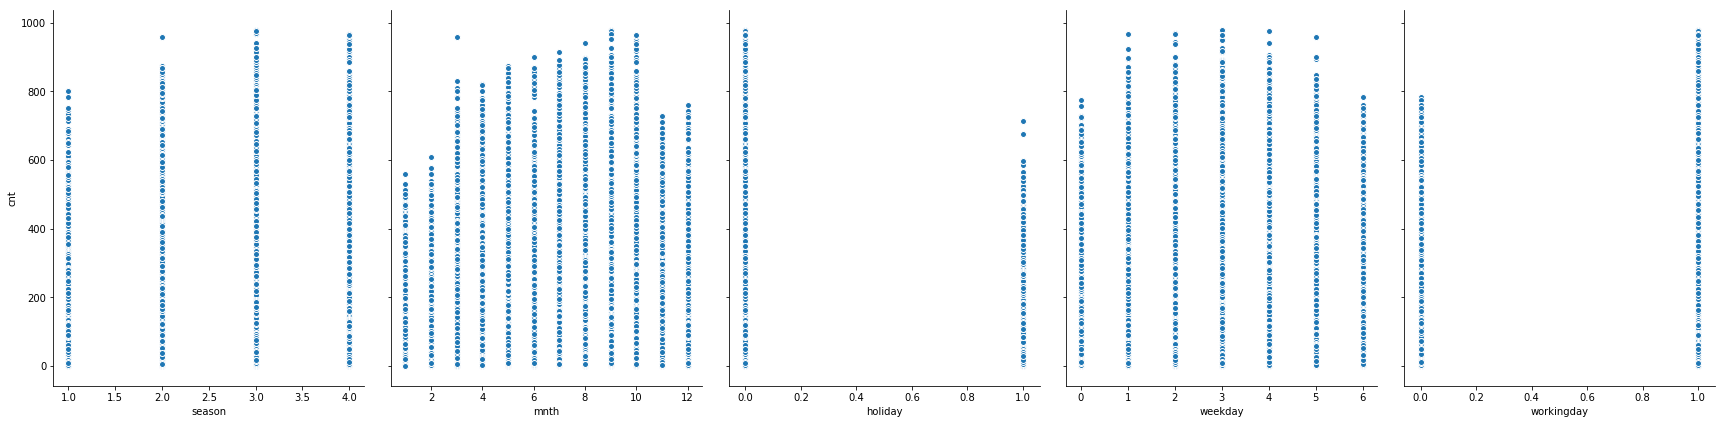

In [255]:
#visualize date variables vs # bikes
sns.pairplot(bikeHourlyData,x_vars = ["season", "mnth", "holiday", "weekday","workingday"],y_vars = ["cnt"], size = 6, aspect = 0.8)

In [187]:
bikeDailyCorrelations = bikeDailyData.corr()
bikeDailyCorrelations

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


Most of the variables have a slightly negative corelation with each other, except for a very strong negative correlation between casual and workingday (casual riders use bikes mostly on the weekend) and positive correlations between number of bikes and season/ temp. 

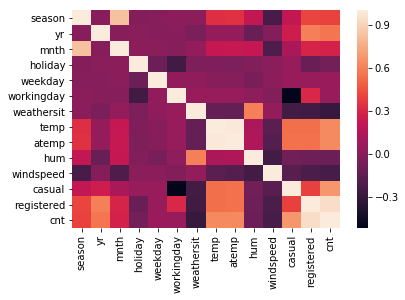

In [189]:
sns.heatmap(bikeDailyCorrelations)

In [190]:
bikeHourlyCorrelations = bikeHourlyData.corr()
bikeHourlyCorrelations

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


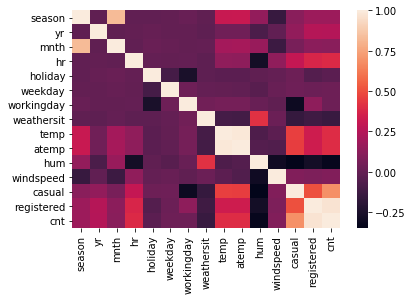

In [192]:
sns.heatmap(bikeHourlyCorrelations)

In [202]:
weekdayGroups = bikeDailyData.groupby("weekday")
weekdayRides = weekdayGroups["cnt"].agg(np.mean)
seasonGroups = bikeDailyData.groupby("season")
seasonRides = seasonGroups["cnt"].agg(np.mean)

Text(0.5,0,'Weekday')

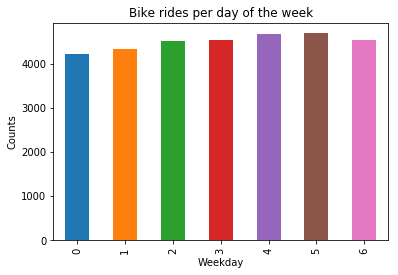

In [203]:
weekdayRides.plot(kind="bar",title = "Bike rides per day of the week")
sns.mpl.pyplot.ylabel("Counts")
sns.mpl.pyplot.xlabel("Weekday")

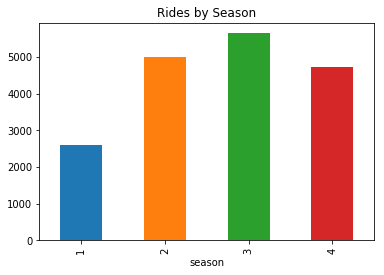

In [205]:
seasonRides.plot(kind="bar",title = "Rides by Season")

In [209]:
weatherGroups = bikeDailyData.groupby("weathersit")
weatherRides = weatherGroups["cnt"].agg(np.mean)

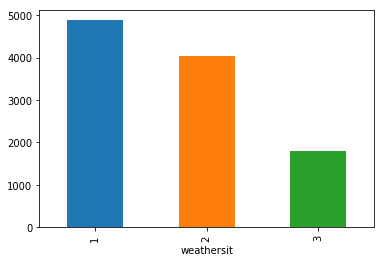

In [210]:
weatherRides.plot(kind="bar")

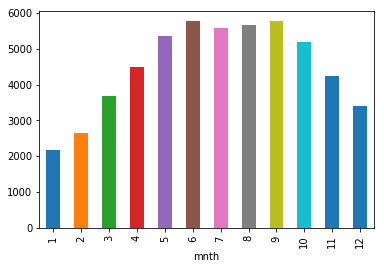

In [211]:
monthGroups = bikeDailyData.groupby("mnth")
monthRides = monthGroups["cnt"].agg(np.mean)
monthRides.plot(kind="bar")

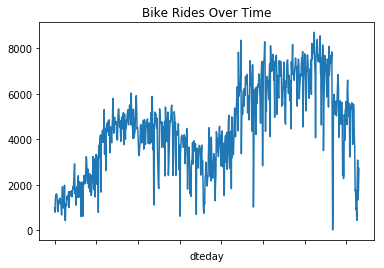

In [213]:
newSeries = pd.Series(projectData["cnt"].values, index = projectData["dteday"])
newSeries.head()
newSeries.plot(title= "Bike Rides Over Time")


In [281]:
X = bikeHourlyData[["hr", "temp"]]
y = bikeHourlyData[["cnt"]]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .2, random_state = 1)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

linReg = LinearRegression()
linReg.fit(Xtrain, ytrain)

print("y-intercept: ", linReg.intercept_)
print("coefficient: ", linReg.coef_)

y_predict_train = linReg.predict(Xtrain)
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(ytrain, y_predict_train)))

y_predict_test = linReg.predict(Xtest)
print("Testing RMSE: ", np.sqrt(metrics.mean_squared_error(ytest, y_predict_test)))

print("R^2: ", metrics.r2_score(ytest, y_predict_test))

(13903, 2) (3476, 2) (13903, 1) (3476, 1)
y-intercept:  [-81.40213668]
coefficient:  [[  8.97216035 335.88592148]]
Training RMSE:  153.96198495451418
Testing RMSE:  153.4060994948957
R^2:  0.2946019550178256


In [235]:
bikeHourlyData.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [283]:
allFeatures = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit","temp", "atemp", "hum", "windspeed"]
Xall = bikeHourlyData[allFeatures]
yall = bikeHourlyData[["cnt"]]
Xalltrain, Xalltest, yalltrain, yalltest = train_test_split(Xall, yall, test_size = .2, random_state = 1)
print(Xalltrain.shape, Xalltest.shape, yalltrain.shape, yalltest.shape)

linRegall = LinearRegression()
linRegall.fit(Xalltrain, yalltrain)

print("y-intercept: ", linRegall.intercept_)
print("coefficient: ", linRegall.coef_)
print(list(zip(allFeatures, linRegall.coef_)))

yall_predict_test = linRegall.predict(Xalltest)
print("Testing RMSE: ", np.sqrt(metrics.mean_squared_error(yalltest, yall_predict_test)))

print("R^2: ", metrics.r2_score(yalltest, yall_predict_test))

(13903, 12) (3476, 12) (13903, 1) (3476, 1)
y-intercept:  [-24.18182853]
coefficient:  [[ 1.95349466e+01  8.03539178e+01  1.55303642e-01  7.56516670e+00
  -2.51541124e+01  1.82643866e+00  4.59872419e+00 -3.56677652e+00
   3.52531083e+01  2.81343326e+02 -2.00577249e+02  3.84699474e+01]]
[('season', array([ 1.95349466e+01,  8.03539178e+01,  1.55303642e-01,  7.56516670e+00,
       -2.51541124e+01,  1.82643866e+00,  4.59872419e+00, -3.56677652e+00,
        3.52531083e+01,  2.81343326e+02, -2.00577249e+02,  3.84699474e+01]))]
Testing RMSE:  141.7720267334398
R^2:  0.3975373993285607


Since the number of bikes has a non-linear relationship with certain variables (yr, season, month, weekday) I will now look at a linear regression with ^2 terms included. 

In [249]:
poly_fit_2 = PolynomialFeatures(degree = 2, interaction_only=False)
fitted_degree2_features = poly_fit_2.fit_transform(bikeHourlyData[allFeatures])
fitted_degree2_features

array([[1.        , 1.        , 0.        , ..., 0.6561    , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.64      , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.64      , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.36      , 0.09852   ,
        0.02696164],
       [1.        , 1.        , 1.        , ..., 0.3136    , 0.075208  ,
        0.01803649],
       [1.        , 1.        , 1.        , ..., 0.4225    , 0.087295  ,
        0.01803649]])

In [250]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(fitted_degree2_features, yall, test_size = 0.2, random_state = 1)

linReg2 = LinearRegression()
linReg2.fit(Xtrain2, ytrain2)

y_predict2_train = linReg2.predict(Xtrain2)

y_predict2_test = linReg2.predict(Xtest2)


print("Testing RMSE: ", np.sqrt(metrics.mean_squared_error(ytest2, y_predict2_test)))
metrics.r2_score(ytest2, y_predict2_test)

Testing RMSE:  120.17405462100022


0.5671171054306521

In [274]:
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(Xall, yall, test_size = 0.2, random_state = 1)
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(Xtrain3,ytrain3)
print("Decision Tree RMSE:",np.sqrt(mean_squared_error(ytest3,decision_tree.predict(Xtest3))))

Decision Tree RMSE: 128.78634935449503


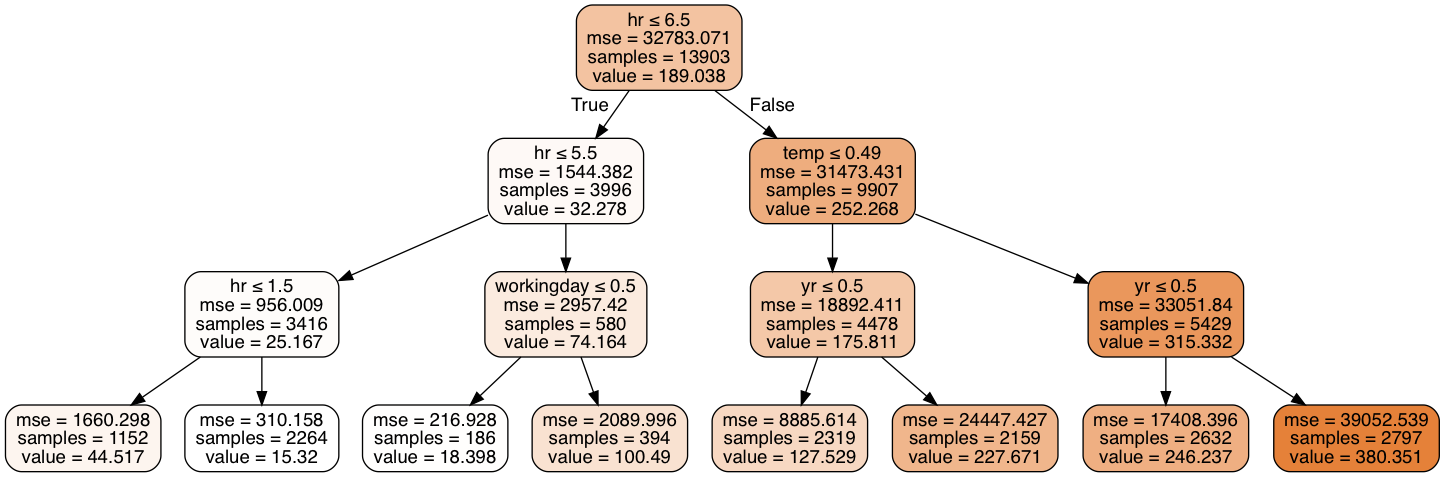

In [275]:
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,  
                    feature_names=Xtrain3.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [276]:
rf = RandomForestRegressor(n_estimators=500, bootstrap=True, oob_score=True, random_state=12)
rf.fit(Xtrain3, ytrain3)
y_pred_rf = rf.predict(Xtest3)

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [277]:
print("Random Forest RMSE:",np.sqrt(mean_squared_error(ytest3,y_pred_rf)))

Random Forest RMSE: 42.19559709497397
